## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/cleaned_data.csv')

#### Show Top 5 Records

In [4]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['selling_price'],axis=1)

In [6]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [7]:
y = df['selling_price']

In [8]:
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15239     250000
15240     925000
15241     425000
15242    1225000
15243    1200000
Name: selling_price, Length: 15244, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(15244, 289)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12195, 289), (3049, 289))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 356076.2435
- Mean Absolute Error: 171387.4666
- R2 Score: 0.8506
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 346130.1520
- Mean Absolute Error: 168954.4059
- R2 Score: 0.8030




c:\DS-project\Car_price_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523349818089536.9, tolerance: 1034732863535.6769
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 356076.8654
- Mean Absolute Error: 171405.1860
- R2 Score: 0.8506
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 353872.5083
- Mean Absolute Error: 170156.2500
- R2 Score: 0.7940


Ridge
Model performance for Training set
- Root Mean Squared Error: 369464.5960
- Mean Absolute Error: 177908.0690
- R2 Score: 0.8391
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 348254.4850
- Mean Absolute Error: 173514.1682
- R2 Score: 0.8005


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 299438.1180
- Mean Absolute Error: 86042.9561
- R2 Score: 0.8943
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 235216.9371
- Mean Absolute Error: 101211.9301
- R2 Score: 0.9090


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 19681.9212
- Mean Absolu

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.924822
3,K-Neighbors Regressor,0.909005
6,XGBRegressor,0.899890
5,Random Forest Regressor,0.877521
4,Decision Tree,0.813989
0,Linear Regression,0.802957
2,Ridge,0.800531
1,Lasso,0.794044
8,AdaBoost Regressor,0.591809


## CatBoosting Regressor

In [19]:
# Initialize the CatBoostRegressor
CB_model = CatBoostRegressor(verbose=False)
# Fit the model
CB_model.fit(X_train, y_train)
# Make predictions
y_pred = CB_model.predict(X_test)
# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 92.48


## Plot y_pred and y_test

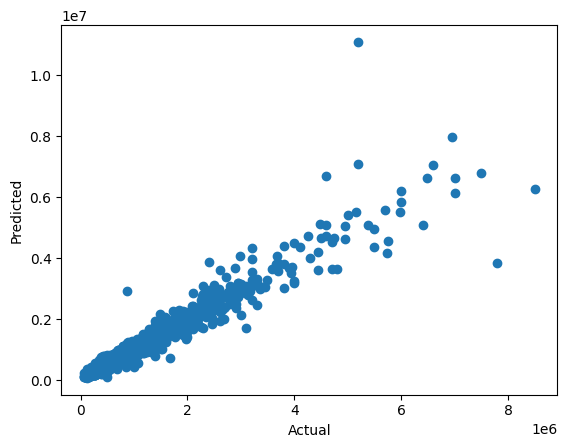

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

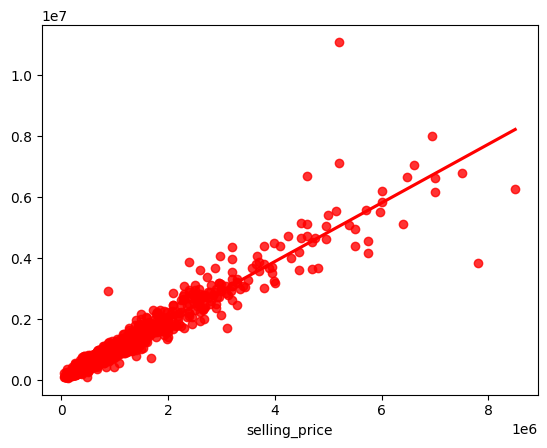

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4093,680000,6.113017e+05,6.869832e+04
10766,350000,3.376905e+05,1.230952e+04
10375,675000,6.963509e+05,-2.135089e+04
3774,7500000,6.798726e+06,7.012737e+05
8779,449000,6.967747e+05,-2.477747e+05
...,...,...,...
230,495000,8.157376e+05,-3.207376e+05
11765,1075000,1.108778e+06,-3.377800e+04
4252,1550000,1.483262e+06,6.673778e+04
10597,250000,2.454277e+05,4.572320e+03
